# Compare inflow plane velocities

In [1]:
# Load the libraries                                                                                                                        

import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import xarray as xr
#import argparse
import os
import pandas as pd
#from netCDF4 import Dataset
import glob

import yaml as yaml
Loader=yaml.safe_load

# Make all plots inline 
%matplotlib inline

In [2]:
def loadyamldef(yamlfile, extradict={}):
    with open(yamlfile) as f:
        returndict = Loader(f)
    # Get the path to yamlfile
    dirpath = os.path.dirname(yamlfile)
    returndict['dirpath'] = dirpath
    # override any entries in the file
    for k,g in extradict.items():
        returndict[k] = g
    return returndict

def getDictWithLabel(dictlist, targetlabel, labeltag='label'):
    for d in dictlist:
        if d[labeltag] == targetlabel: return d
    return None

def getDictBetween(dictlist, x1, x2, labeltag='distance'):
    for d in dictlist:
        if (x1 <= d[labeltag]) and (d[labeltag] <= x2): return d
    return None


In [3]:
# Edit this list to include data
#           # YAML file,                                                dictionary with extra labels and stuff
datasets = [
    ['DATA_Summit_amrwind_EastKP/KP_Stable.yaml',        {'label':'AMR-Wind Summit (East KP)', 'plotargs':{'color':'pink'}}],
    ['DATA_SNL_naluwind_stable_KPeast/KP_Stable.yaml',   {'label':'Nalu-Wind SNL',   'plotargs':{'color':'b'}}],
]

rotorD = 127.0
zHH    = 90

In [4]:
datadefs = []
for data in datasets:
    datadefs.append(loadyamldef(data[0], extradict=data[1]))

In [5]:
# Define the things you want to plot here
plotlist = [
    ['AMR-Wind Summit (East KP)', (-35, -30)],
    ['Nalu-Wind SNL', (-25, -20)],
]

Text(0.5, 0, 'horizontal velocity [m/s]')

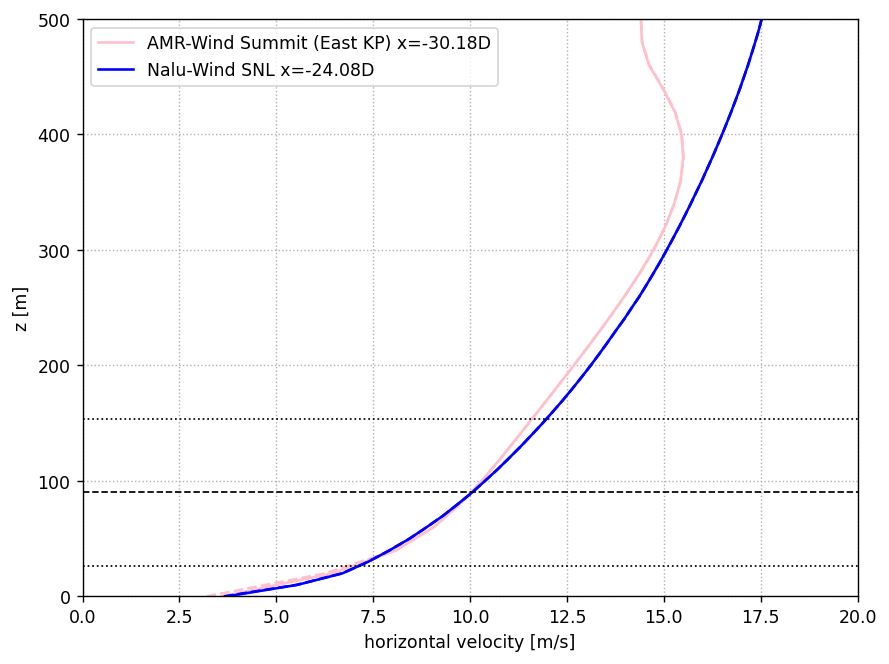

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,6), dpi=125)

for p in plotlist:
    data = getDictWithLabel(datadefs, p[0])
    plotargsorig = data['plotargs']
    xtarget = p[1]
    
    # Load and plot the precursor data
    if isinstance(xtarget, tuple):
        d = getDictBetween(data['precursorrun'], xtarget[0], xtarget[1])
    else:
        d = getDictWithLabel(data['precursorrun'], xtarget, labeltag='distance')
    xdist = d['distance']
    plotargs = plotargsorig.copy()
    plotargs['label'] = data['label'] + ' x=%0.2fD'%xdist
    profiledat = np.loadtxt(os.path.join(data['dirpath'],d['filename']))
    z = profiledat[:,0]
    Uh = np.sqrt(profiledat[:,1]**2 + profiledat[:,2]**2)
    ax.plot(Uh, z, **plotargs)

    # Load and plot the turbine data
    if isinstance(xtarget, tuple):
        d = getDictBetween(data['turbinerun'], xtarget[0], xtarget[1])
    else:
        d = getDictWithLabel(data['turbinerun'], xtarget, labeltag='distance')
    xdist = d['distance']
    plotargs = plotargsorig.copy()
    plotargs['ls'] = '--'
    profiledat = np.loadtxt(os.path.join(data['dirpath'],d['filename']))
    z = profiledat[:,0]
    Uh = np.sqrt(profiledat[:,1]**2 + profiledat[:,2]**2)
    ax.plot(Uh, z, **plotargs)

# Plot the rotor lines
ax.axhline(zHH+0.5*rotorD, ls=':', lw=1.0, color='k')
ax.axhline(zHH,            ls='--',lw=1.0, color='k')
ax.axhline(zHH-0.5*rotorD, ls=':', lw=1.0, color='k')

ax.set_ylim([0, 500])
ax.set_xlim([0, 20])

ax.grid(ls=':')
ax.legend()

ax.set_ylabel('z [m]')
ax.set_xlabel('horizontal velocity [m/s]')